In [188]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.ticker import ScalarFormatter
import geopandas as gpd
from shapely.geometry import Point

In [189]:
rwi_cellular_2019_peru = pd.read_csv("/Users/ishaarora/Desktop/Peru_interim/RWI_cellular_2019_peru.csv")
rwi_cellular_2020_peru = pd.read_csv("/Users/ishaarora/Desktop/Peru_interim/RWI_cellular_2020_peru.csv")
rwi_cellular_2021_peru = pd.read_csv("/Users/ishaarora/Desktop/Peru_interim/RWI_cellular_2021_peru.csv")
rwi_cellular_2022_peru = pd.read_csv("/Users/ishaarora/Desktop/Peru_interim/RWI_cellular_2022_peru.csv")


In [190]:
rwi_cellular_2019 = pd.pivot_table(rwi_cellular_2019_peru, values =['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4', "rwi"], index = ["NAME_3"])
rwi_cellular_2019["avg_d_mbps_qs"] = rwi_cellular_2019[['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4']].mean(axis = 1)

rwi_cellular_2020 = pd.pivot_table(rwi_cellular_2020_peru, values =['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4', "rwi"], index = ["NAME_3"])
rwi_cellular_2020["avg_d_mbps_qs"] = rwi_cellular_2020[['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4']].mean(axis = 1)

rwi_cellular_2021 = pd.pivot_table(rwi_cellular_2021_peru, values =['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4', "rwi"], index = ["NAME_3"])
rwi_cellular_2021["avg_d_mbps_qs"] = rwi_cellular_2021[['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4']].mean(axis = 1)

rwi_cellular_2022 = pd.pivot_table(rwi_cellular_2022_peru, values =['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4', "rwi"], index = ["NAME_3"])
rwi_cellular_2022["avg_d_mbps_qs"] = rwi_cellular_2022[['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4']].mean(axis = 1)

In [191]:
# fig, ax = plt.subplots(figsize=(10,10))
# sns.regplot(data = rwi_cellular_2019, x = "avg_d_mbps_Q1" , y = "rwi", fit_reg = True, ci=False, ax = ax, label = "Q1");
# sns.regplot(data = rwi_cellular_2019, x = "avg_d_mbps_Q2" , y = "rwi", fit_reg = True, ci=False, ax = ax, line_kws={'color':'orange'}, label = "Q2", color= 'orange');
# sns.regplot(data = rwi_cellular_2019, x = "avg_d_mbps_Q3" , y = "rwi", fit_reg = True, ci=False, ax = ax, line_kws={'color':'magenta'}, label = "Q3", color= 'magenta');
# sns.regplot(data = rwi_cellular_2019, x = "avg_d_mbps_Q4" , y = "rwi", fit_reg = True, ci=False, ax = ax, line_kws={'color':'brown'}, label = "Q4", color= 'brown');
# ax.set(ylabel='Relative Wealth Index, Peru', xlabel='Average Cellular Data for Peru in 2019')
# ax.legend()
# plt.show()

In [192]:
import plotly.io as pio
pio.renderers.default = "iframe"
import plotly.express as px


fig = px.scatter(rwi_cellular_2019, x = ["avg_d_mbps_Q1", "avg_d_mbps_Q2", "avg_d_mbps_Q3", "avg_d_mbps_Q4"], y = "rwi",
           trendline='ols', width=1000, height=800, labels = {"rwi": "Relative Wealth Index, Peru", "value": "Average Cellular Data for 2019"}, 
           title = "Average Cellular Data for Peru with Relative Wealth, 2019", color_discrete_sequence=['#1f77b4', '#ff7f0e', 'forestgreen', '#e377c2'])


(['Q1', 'Q2', 'Q3', 'Q4'])    


newnames = {'avg_d_mbps_Q1':'Q1', 'avg_d_mbps_Q2': 'Q2', 'avg_d_mbps_Q3':'Q3', 'avg_d_mbps_Q4': 'Q4'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()


In [193]:
rwi_cellular_2019[["avg_d_mbps_Q1", "avg_d_mbps_Q2", "avg_d_mbps_Q3", "avg_d_mbps_Q4", "avg_d_mbps_qs", "rwi"]].corr()

,avg_d_mbps_Q1,avg_d_mbps_Q2,avg_d_mbps_Q3,avg_d_mbps_Q4,avg_d_mbps_qs,rwi
avg_d_mbps_Q1,1.000000,0.385415,0.204375,0.203021,0.655698,0.062803
avg_d_mbps_Q2,0.385415,1.000000,0.299621,0.217256,0.710180,0.066270
avg_d_mbps_Q3,0.204375,0.299621,1.000000,0.398613,0.705826,0.017603
avg_d_mbps_Q4,0.203021,0.217256,0.398613,1.000000,0.650657,0.082638
avg_d_mbps_qs,0.655698,0.710180,0.705826,0.650657,1.000000,0.083019
rwi,0.062803,0.066270,0.017603,0.082638,0.083019,1.000000


In [194]:
rwi_cellular_2019_copy = rwi_cellular_2019.copy()
rwi_cellular_2019_copy = rwi_cellular_2019_copy.reset_index()

rwi_cellular_2020_copy = rwi_cellular_2020.copy()
rwi_cellular_2020_copy = rwi_cellular_2020_copy.reset_index()

rwi_cellular_2021_copy = rwi_cellular_2021.copy()
rwi_cellular_2021_copy = rwi_cellular_2021_copy.reset_index()

rwi_cellular_2022_copy = rwi_cellular_2022.copy()
rwi_cellular_2022_copy = rwi_cellular_2022_copy.reset_index()

In [195]:
rwi_cellular_2019_2022 = rwi_cellular_2019_copy[["avg_d_mbps_qs", "NAME_3"]].merge(rwi_cellular_2020_copy[["avg_d_mbps_qs", "NAME_3"]], on = "NAME_3", suffixes = ('_x', '_y')).merge(rwi_cellular_2021_copy[["avg_d_mbps_qs", "NAME_3"]], on = "NAME_3", suffixes = ('_a', '_b')).merge(rwi_cellular_2022_copy[["avg_d_mbps_qs", "NAME_3"]], on = "NAME_3", suffixes = ('_c', '_d'))



#.merge(rwi_cellular_2021_copy, on = "NAME_3").merge(rwi_cellular_2022_copy, on = "NAME_3")
rwi_cellular_2019_2022 = rwi_cellular_2019_2022.rename(columns = {"avg_d_mbps_qs_x": "2019", "avg_d_mbps_qs_y": "2020", "avg_d_mbps_qs_c": "2021", "avg_d_mbps_qs_d": "2022"})

In [196]:
rwi_cellular_2019_2022_avg = rwi_cellular_2019_2022.drop(columns = ["NAME_3"]).mean(axis = 0)
rwi_cellular_2019_2022_avg

2019    20.278114
2020    17.611617
2021    18.921865
2022    18.921865
dtype: float64

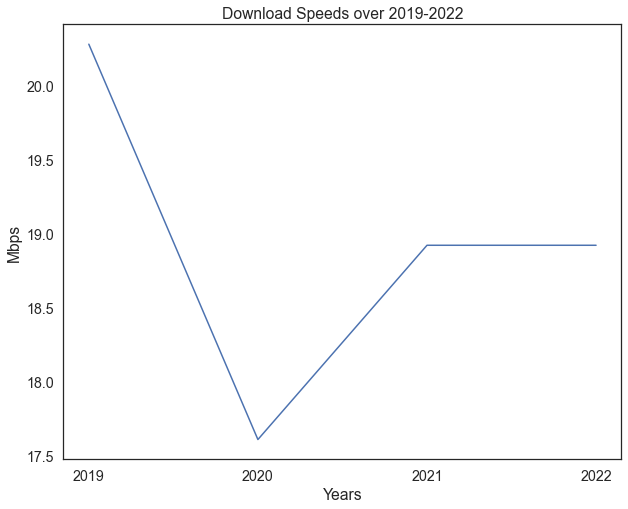

In [197]:
rwi_cellular_2019_2022_avg.plot(kind = "line")
plt.title("Download Speeds over 2019-2022")
plt.xlabel("Years")
plt.ylabel("Mbps")
plt.savefig("/Users/ishaarora/Desktop/Data Visualizations/Peru/Download_Speeds_2019-22.png", dpi=150)
plt.show()

In [198]:
fig = px.scatter(rwi_cellular_2020, x = ["avg_d_mbps_Q1", "avg_d_mbps_Q2", "avg_d_mbps_Q3", "avg_d_mbps_Q4"], y = "rwi",
           trendline='ols', width=1000, height=800, labels = {"rwi": "Relative Wealth Index, Peru", "value": "Average Cellular Data for 2020"}, 
           title = "Average Cellular Data for Peru with Relative Wealth, 2020", color_discrete_sequence=['#1f77b4', '#ff7f0e', 'forestgreen', '#e377c2'])


(['Q1', 'Q2', 'Q3', 'Q4'])    


newnames = {'avg_d_mbps_Q1':'Q1', 'avg_d_mbps_Q2': 'Q2', 'avg_d_mbps_Q3':'Q3', 'avg_d_mbps_Q4': 'Q4'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()


In [199]:
fig = px.scatter(rwi_cellular_2021, x = ["avg_d_mbps_Q1", "avg_d_mbps_Q2", "avg_d_mbps_Q3", "avg_d_mbps_Q4"], y = "rwi",
           trendline='ols', width=1000, height=800, labels = {"rwi": "Relative Wealth Index, Peru", "value": "Average Cellular Data for 2021"}, 
           title = "Average Cellular Data for Peru with Relative Wealth, 2021", color_discrete_sequence=['#1f77b4', '#ff7f0e', 'forestgreen', '#e377c2'])


(['Q1', 'Q2', 'Q3', 'Q4'])    


newnames = {'avg_d_mbps_Q1':'Q1', 'avg_d_mbps_Q2': 'Q2', 'avg_d_mbps_Q3':'Q3', 'avg_d_mbps_Q4': 'Q4'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()


In [200]:
fig = px.scatter(rwi_cellular_2022, x = ["avg_d_mbps_Q1", "avg_d_mbps_Q2", "avg_d_mbps_Q3", "avg_d_mbps_Q4"], y = "rwi",
           trendline='ols', width=1000, height=800, labels = {"rwi": "Relative Wealth Index, Peru", "value": "Average Cellular Data for 2022"}, 
           title = "Average Cellular Data for Peru with Relative Wealth, 2022", color_discrete_sequence=['#1f77b4', '#ff7f0e', 'forestgreen', '#e377c2'])


(['Q1', 'Q2', 'Q3', 'Q4'])    


newnames = {'avg_d_mbps_Q1':'Q1', 'avg_d_mbps_Q2': 'Q2', 'avg_d_mbps_Q3':'Q3', 'avg_d_mbps_Q4': 'Q4'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()


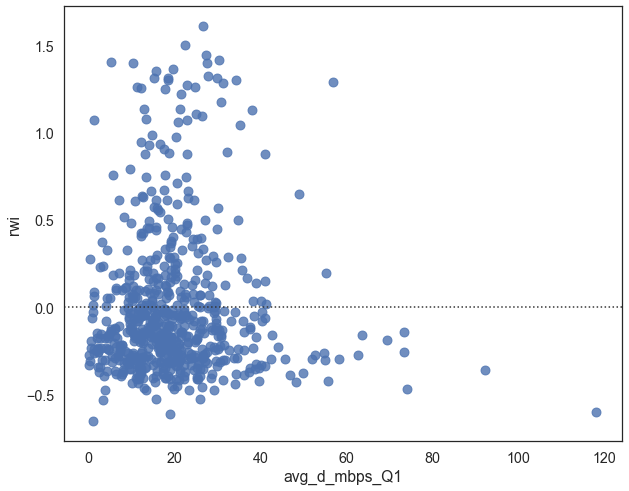

In [201]:
sns.residplot(data = rwi_cellular_2019, x = "avg_d_mbps_Q1" , y = "rwi", scatter_kws={"s": 80});

In [202]:
#from data 100 textbook:

def theta_1(x, y):
    r = x.corr(y)
    return r * y.std() / x.std()

def theta_0(x, y):
    return y.mean() - theta_1(x, y) * x.mean()

t1 = theta_1(rwi_cellular_2019['avg_d_mbps_qs'], rwi_cellular_2019['rwi'])
t0 = theta_0(rwi_cellular_2019['avg_d_mbps_qs'], rwi_cellular_2019['rwi'])

In [203]:
print(t0, t1)

-0.1655637492591478 0.004059214845237442


In [204]:
prediction = t0 + t1 * rwi_cellular_2019['avg_d_mbps_qs']
error = rwi_cellular_2019['rwi'] - prediction
fit = pd.DataFrame(dict(prediction=prediction, error=error))

In [205]:
fig = px.scatter(fit, y='error', x='prediction',  width=1000, height=800)

fig.add_hline(0, line_width=2, line_dash='dash', opacity=1)
fig.show()

In [100]:
fig = px.scatter(fit, y='error', x='prediction',  width=1000, height=800)

fig.add_hline(0, line_width=2, line_dash='dash', opacity=1)
fig.show()

In [103]:
from sklearn.linear_model import LinearRegression 

y = rwi_cellular_2019['rwi']
x = rwi_cellular_2019['avg_d_mbps_qs']
reg = LinearRegression().fit(x.values.reshape(-1,1), y)



In [104]:
print(f"Relative Wealth Index = {reg.intercept_:.2f} + {reg.coef_[0]:.2f}(Cellular Data in mbps)")

Relative Wealth Index = -0.17 + 0.00(Cellular Data in mbps)


In [18]:
rwi_cellular_2019_region = pd.pivot_table(rwi_cellular_2019_peru, values =['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4', "rwi"], index = ["NAME_3"])
rwi_cellular_2019_region["avg_d_mbps_qs"] = rwi_cellular_2019_region[['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4']].mean(axis = 1)

rwi_cellular_2020_region = pd.pivot_table(rwi_cellular_2020_peru, values =['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4', "rwi"], index = ["NAME_3"])
rwi_cellular_2020_region["avg_d_mbps_qs"] = rwi_cellular_2020_region[['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4']].mean(axis = 1)

rwi_cellular_2021_region = pd.pivot_table(rwi_cellular_2021_peru, values =['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4', "rwi"], index = ["NAME_3"])
rwi_cellular_2021_region["avg_d_mbps_qs"] = rwi_cellular_2021_region[['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4']].mean(axis = 1)

rwi_cellular_2022_region = pd.pivot_table(rwi_cellular_2022_peru, values =['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4', "rwi"], index = ["NAME_3"])
rwi_cellular_2022_region["avg_d_mbps_qs"] = rwi_cellular_2022_region[['avg_d_mbps_Q1', 'avg_d_mbps_Q2', 'avg_d_mbps_Q3', 'avg_d_mbps_Q4']].mean(axis = 1)

In [19]:
rwi_cellular_2019_region

,avg_d_mbps_Q1,avg_d_mbps_Q2,avg_d_mbps_Q3,avg_d_mbps_Q4,rwi,avg_d_mbps_qs
NAME_3,,,,,,
Abancay,14.727571,12.014840,17.478571,13.791667,-0.050000,14.503162
Acari,27.922000,8.188500,9.411500,27.239500,0.007000,18.190375
Acobamba,30.884909,27.429571,15.955357,19.655182,-0.216500,23.481255
Acobambilla,22.120000,21.811000,12.025000,6.007833,-0.486538,15.490958
Acomayo,31.360500,13.365500,12.181308,20.229200,-0.357125,19.284127
...,...,...,...,...,...,...
Zepita,12.843000,26.552000,24.039000,13.725812,-0.390236,19.289953
Zorritos,22.384182,27.929000,21.355889,36.735300,0.002037,27.101093
Zurite,17.468000,16.875000,2.258667,20.238000,0.148375,14.209917


In [20]:
rwi_cellular_2019_region = rwi_cellular_2019_region.reset_index()
rwi_cellular_2020_region = rwi_cellular_2020_region.reset_index()
rwi_cellular_2021_region = rwi_cellular_2021_region.reset_index()
rwi_cellular_2022_region = rwi_cellular_2022_region.reset_index()

In [25]:
rwi_cellular_2019_region

,NAME_3,avg_d_mbps_Q1,avg_d_mbps_Q2,avg_d_mbps_Q3,avg_d_mbps_Q4,rwi,avg_d_mbps_qs
0,Abancay,14.727571,12.014840,17.478571,13.791667,-0.050000,14.503162
1,Acari,27.922000,8.188500,9.411500,27.239500,0.007000,18.190375
2,Acobamba,30.884909,27.429571,15.955357,19.655182,-0.216500,23.481255
3,Acobambilla,22.120000,21.811000,12.025000,6.007833,-0.486538,15.490958
4,Acomayo,31.360500,13.365500,12.181308,20.229200,-0.357125,19.284127
...,...,...,...,...,...,...,...
641,Zepita,12.843000,26.552000,24.039000,13.725812,-0.390236,19.289953
642,Zorritos,22.384182,27.929000,21.355889,36.735300,0.002037,27.101093
643,Zurite,17.468000,16.875000,2.258667,20.238000,0.148375,14.209917
644,n.a. (Lake Titicaca),18.693700,16.121143,18.917933,10.312615,-0.184762,16.011348


In [186]:
rwi_cellular_2019_region["NAME_3"].unique()

KeyError: 'NAME_3'

In [50]:
Peru_Census = pd.read_csv("/Users/ishaarora/Desktop/Census_Data_PeruGroup.csv")

In [51]:
Peru_Census

,District,Gas Stove -Yes,Refrigerator/Freezer,Clothes washer,Car/van/autombile,Motorcycle,Cellular Phone,No Cable/satellite Tv,Average Age
0,Abancay,17857.0,17857.0,4792.0,2583.0,1517.0,18877.0,12706.0,29.200136
1,Abelardo Pardo Lezameta,1.0,1.0,NaN,NaN,NaN,103.0,122.0,35.397541
2,Acarí,1368.0,1368.0,381.0,180.0,340.0,1331.0,714.0,34.873654
3,Acas,30.0,30.0,NaN,1.0,2.0,170.0,221.0,34.692073
4,Accha,277.0,277.0,7.0,20.0,65.0,369.0,986.0,34.430647
...,...,...,...,...,...,...,...,...,...
1719,Zepita,2958.0,2958.0,16.0,47.0,247.0,3438.0,7211.0,34.326186
1720,Zorritos,3113.0,3113.0,904.0,306.0,662.0,2981.0,1040.0,30.256164
1721,Zurite,590.0,590.0,30.0,68.0,63.0,736.0,944.0,34.448566
1722,Zúñiga,271.0,271.0,20.0,24.0,65.0,294.0,252.0,34.884323


In [71]:
rwi_cellular_2019_region

,NAME_3,avg_d_mbps_Q1,avg_d_mbps_Q2,avg_d_mbps_Q3,avg_d_mbps_Q4,rwi,avg_d_mbps_qs
0,Abancay,14.727571,12.014840,17.478571,13.791667,-0.050000,14.503162
1,Acari,27.922000,8.188500,9.411500,27.239500,0.007000,18.190375
2,Acobamba,30.884909,27.429571,15.955357,19.655182,-0.216500,23.481255
3,Acobambilla,22.120000,21.811000,12.025000,6.007833,-0.486538,15.490958
4,Acomayo,31.360500,13.365500,12.181308,20.229200,-0.357125,19.284127
...,...,...,...,...,...,...,...
641,Zepita,12.843000,26.552000,24.039000,13.725812,-0.390236,19.289953
642,Zorritos,22.384182,27.929000,21.355889,36.735300,0.002037,27.101093
643,Zurite,17.468000,16.875000,2.258667,20.238000,0.148375,14.209917
644,n.a. (Lake Titicaca),18.693700,16.121143,18.917933,10.312615,-0.184762,16.011348


In [80]:
pip install Unidecode


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 3.3 MB/s eta 0:00:00a 0:00:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: /usr/local/opt/python@3.9/bin/python3.9 -m 

In [83]:
from unidecode import unidecode

In [113]:
Peru_Census['District'] = Peru_Census['District'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [114]:
Peru_Census

,District,Gas Stove -Yes,Refrigerator/Freezer,Clothes washer,Car/van/autombile,Motorcycle,Cellular Phone,No Cable/satellite Tv,Average Age
0,Abancay,17857.0,17857.0,4792.0,2583.0,1517.0,18877.0,12706.0,29.200136
1,Abelardo Pardo Lezameta,1.0,1.0,NaN,NaN,NaN,103.0,122.0,35.397541
2,Acari,1368.0,1368.0,381.0,180.0,340.0,1331.0,714.0,34.873654
3,Acas,30.0,30.0,NaN,1.0,2.0,170.0,221.0,34.692073
4,Accha,277.0,277.0,7.0,20.0,65.0,369.0,986.0,34.430647
...,...,...,...,...,...,...,...,...,...
1719,Zepita,2958.0,2958.0,16.0,47.0,247.0,3438.0,7211.0,34.326186
1720,Zorritos,3113.0,3113.0,904.0,306.0,662.0,2981.0,1040.0,30.256164
1721,Zurite,590.0,590.0,30.0,68.0,63.0,736.0,944.0,34.448566
1722,Zuniga,271.0,271.0,20.0,24.0,65.0,294.0,252.0,34.884323


In [133]:
rwi_cellular_2019_region = rwi_cellular_2019_region.rename({"NAME_3":"District"}, axis = 1)
rwi_cellular_2020_region = rwi_cellular_2020_region.rename({"NAME_3":"District"}, axis = 1)
rwi_cellular_2021_region = rwi_cellular_2021_region.rename({"NAME_3":"District"}, axis = 1)
rwi_cellular_2022_region = rwi_cellular_2022_region.rename({"NAME_3":"District"}, axis = 1)

In [135]:
Peru_Census["District"] = Peru_Census["District"].astype(str)
rwi_cellular_2019_region["District"] = rwi_cellular_2019_region["District"].astype(str)
rwi_cellular_2020_region["District"] = rwi_cellular_2020_region["District"].astype(str)
rwi_cellular_2021_region["District"] = rwi_cellular_2021_region["District"].astype(str)
rwi_cellular_2022_region["District"] = rwi_cellular_2022_region["District"].astype(str)

In [136]:
Peru_Census["District"] = Peru_Census["District"].str.strip()
rwi_cellular_2019_region["District"] = rwi_cellular_2019_region["District"].str.strip()
rwi_cellular_2020_region["District"] = rwi_cellular_2020_region["District"].str.strip()
rwi_cellular_2021_region["District"] = rwi_cellular_2021_region["District"].str.strip()
rwi_cellular_2022_region["District"] = rwi_cellular_2022_region["District"].str.strip()

In [140]:
rwi_cellular_census_2019 = rwi_cellular_2019_region.merge(Peru_Census, left_on = "District",right_on = "District", how = "inner")
rwi_cellular_census_2020 = rwi_cellular_2020_region.merge(Peru_Census,left_on =  "District",right_on = "District", how = "inner")
rwi_cellular_census_2021 = rwi_cellular_2021_region.merge(Peru_Census,left_on =  "District",right_on = "District", how = "inner")
rwi_cellular_census_2022 = rwi_cellular_2022_region.merge(Peru_Census,left_on =  "District",right_on = "District", how = "inner")


In [143]:
rwi_cellular_census_2019

,District,avg_d_mbps_Q1,avg_d_mbps_Q2,avg_d_mbps_Q3,avg_d_mbps_Q4,rwi,avg_d_mbps_qs,Gas Stove -Yes,Refrigerator/Freezer,Clothes washer,Car/van/autombile,Motorcycle,Cellular Phone,No Cable/satellite Tv,Average Age
0,Abancay,14.727571,11.285276,17.346167,11.740839,-0.050000,13.774963,17857.000000,17857.000000,4792.0,2583.0,1517.0,18877.000000,12706.000000,29.200136
1,Acari,27.922000,18.554000,11.430143,29.748200,0.007000,21.913586,1368.000000,1368.000000,381.0,180.0,340.0,1331.000000,714.000000,34.873654
2,Accha,0.265000,9.622000,28.650500,26.673800,-0.425563,16.302825,277.000000,277.000000,7.0,20.0,65.0,369.000000,986.000000,34.430647
3,Aco,0.358000,12.902000,44.217667,21.673000,-0.212600,19.787667,199.500000,199.500000,3.0,51.0,28.0,249.500000,337.000000,37.709644
4,Acobamba,30.884909,38.033714,22.860773,22.625533,-0.216500,28.601232,1257.666667,1257.666667,125.5,216.0,136.0,1589.666667,1884.333333,31.584413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,Yuyapichis,50.829000,15.953667,25.881750,21.824200,-0.452433,28.622154,763.000000,763.000000,42.0,25.0,247.0,1008.000000,1269.000000,25.853527
782,Zarumilla,9.405500,6.446800,21.891778,19.840818,0.051417,14.396224,5655.000000,5655.000000,1324.0,370.0,1904.0,5273.000000,2993.000000,28.748439
783,Zepita,12.843000,22.721600,33.196286,9.117375,-0.390236,19.469565,2958.000000,2958.000000,16.0,47.0,247.0,3438.000000,7211.000000,34.326186
784,Zorritos,22.384182,29.318042,36.453273,35.037333,0.002037,30.798207,3113.000000,3113.000000,904.0,306.0,662.0,2981.000000,1040.000000,30.256164


In [138]:
pip install psmpy

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: /usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [139]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

In [148]:
print(rwi_cellular_census_2019["avg_d_mbps_qs"].median())
print(rwi_cellular_census_2020["avg_d_mbps_qs"].median())
print(rwi_cellular_census_2021["avg_d_mbps_qs"].median())
print(rwi_cellular_census_2022["avg_d_mbps_qs"].median())

17.663494228279028
16.308730743135378
17.663494228279028
17.663494228279028


In [150]:
rwi_cellular_census_2019["Binary Value"] =  ["1" if x >= 17.663 else "0" for x in rwi_cellular_dhs_2019["avg_d_mbps_qs"]]
rwi_cellular_census_2020["Binary Value"] =  ["1" if x >= 16.308 else "0" for x in rwi_cellular_dhs_2020["avg_d_mbps_qs"]]
rwi_cellular_census_2021["Binary Value"] =  ["1" if x >= 17.663 else "0" for x in rwi_cellular_dhs_2021["avg_d_mbps_qs"]]
rwi_cellular_census_2022["Binary Value"] =  ["1" if x >= 17.663 else "0" for x in rwi_cellular_dhs_2022["avg_d_mbps_qs"]]

In [153]:
rwi_cellular_census_2019

,District,avg_d_mbps_Q1,avg_d_mbps_Q2,avg_d_mbps_Q3,avg_d_mbps_Q4,rwi,avg_d_mbps_qs,Gas Stove -Yes,Refrigerator/Freezer,Clothes washer,Car/van/autombile,Motorcycle,Cellular Phone,No Cable/satellite Tv,Average Age,Binary Value
0,Abancay,14.727571,11.285276,17.346167,11.740839,-0.050000,13.774963,17857.000000,17857.000000,4792.0,2583.0,1517.0,18877.000000,12706.000000,29.200136,0
1,Acari,27.922000,18.554000,11.430143,29.748200,0.007000,21.913586,1368.000000,1368.000000,381.0,180.0,340.0,1331.000000,714.000000,34.873654,1
2,Accha,0.265000,9.622000,28.650500,26.673800,-0.425563,16.302825,277.000000,277.000000,7.0,20.0,65.0,369.000000,986.000000,34.430647,0
3,Aco,0.358000,12.902000,44.217667,21.673000,-0.212600,19.787667,199.500000,199.500000,3.0,51.0,28.0,249.500000,337.000000,37.709644,1
4,Acobamba,30.884909,38.033714,22.860773,22.625533,-0.216500,28.601232,1257.666667,1257.666667,125.5,216.0,136.0,1589.666667,1884.333333,31.584413,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,Yuyapichis,50.829000,15.953667,25.881750,21.824200,-0.452433,28.622154,763.000000,763.000000,42.0,25.0,247.0,1008.000000,1269.000000,25.853527,1
782,Zarumilla,9.405500,6.446800,21.891778,19.840818,0.051417,14.396224,5655.000000,5655.000000,1324.0,370.0,1904.0,5273.000000,2993.000000,28.748439,0
783,Zepita,12.843000,22.721600,33.196286,9.117375,-0.390236,19.469565,2958.000000,2958.000000,16.0,47.0,247.0,3438.000000,7211.000000,34.326186,1
784,Zorritos,22.384182,29.318042,36.453273,35.037333,0.002037,30.798207,3113.000000,3113.000000,904.0,306.0,662.0,2981.000000,1040.000000,30.256164,1


In [163]:
rwi_cellular_census_2019 = rwi_cellular_census_2019.dropna()
rwi_cellular_census_2020 = rwi_cellular_census_2020.dropna()
rwi_cellular_census_2021 = rwi_cellular_census_2021.dropna()
rwi_cellular_census_2022 = rwi_cellular_census_2022.dropna()

In [174]:
psm_2019 = PsmPy(rwi_cellular_census_2019, treatment='Binary Value', indx='District', exclude = [ "avg_d_mbps_Q1","avg_d_mbps_Q2", "avg_d_mbps_Q3", 
                                                                                       "avg_d_mbps_Q4", "avg_d_mbps_qs", "rwi"])
psm_2019

In [175]:
psm_2019.logistic_ps(balance = True)

In [176]:
psm_2019.predicted_data

,District,Gas Stove -Yes,Refrigerator/Freezer,Clothes washer,Car/van/autombile,Motorcycle,Cellular Phone,No Cable/satellite Tv,Average Age,propensity_score,propensity_logit,Binary Value
0,Andahuaylillas,1065.0,1065.0,147.0,154.0,90.0,1281.0,1504.0,28.967569,0.503999,0.015995,1
1,Cachimayo,528.0,528.0,129.0,137.0,34.0,577.0,538.0,32.345508,0.549998,0.200662,1
2,Canta,579.0,579.0,60.0,59.0,29.0,620.0,443.0,37.924948,0.544503,0.178482,1
3,Caraveli,955.0,955.0,235.0,157.0,240.0,1015.0,622.0,31.224466,0.552703,0.211597,1
4,Cerro Colorado,60965.0,60965.0,18284.0,14854.0,2736.0,59618.0,47908.0,29.745360,0.869624,1.897641,1
...,...,...,...,...,...,...,...,...,...,...,...,...
774,Yungay,3162.0,3162.0,417.0,400.0,251.0,4488.0,4748.0,32.236074,0.318001,-0.762976,0
775,Yunguyo,5369.0,5369.0,139.0,384.0,832.0,5402.0,8494.0,35.945176,0.416811,-0.335877,0
776,Yurimaguas,13305.0,13305.0,3568.0,391.0,6053.0,15031.0,11459.0,26.972042,0.291509,-0.888066,0
777,Zarumilla,5655.0,5655.0,1324.0,370.0,1904.0,5273.0,2993.0,28.748439,0.598884,0.400817,0


In [177]:
psm_2019.predicted_data[["propensity_score", "District", "Binary Value"]]

,propensity_score,District,Binary Value
0,0.503999,Andahuaylillas,1
1,0.549998,Cachimayo,1
2,0.544503,Canta,1
3,0.552703,Caraveli,1
4,0.869624,Cerro Colorado,1
...,...,...,...
774,0.318001,Yungay,0
775,0.416811,Yunguyo,0
776,0.291509,Yurimaguas,0
777,0.598884,Zarumilla,0


In [178]:
psm_2019.knn_matched_12n(matcher='propensity_score', how_many=1)
psm_2019.df_matched

,District,Gas Stove -Yes,Refrigerator/Freezer,Clothes washer,Car/van/autombile,Motorcycle,Cellular Phone,No Cable/satellite Tv,Average Age,propensity_score,propensity_logit,Binary Value
0,Abancay,17857.0,17857.0,4792.0,2583.0,1517.0,18877.0,12706.0,29.200136,0.264157,-1.024472,0
1,Ancahuasi,819.0,819.0,23.0,77.0,37.0,1446.0,2000.0,32.154039,0.429849,-0.282467,0
2,Bernal,1061.0,1061.0,83.0,60.0,249.0,1502.0,1409.0,28.395332,0.461555,-0.154083,0
3,Cachachi,873.0,873.0,31.0,58.0,274.0,3911.0,5676.0,27.529629,0.129621,-1.904313,0
4,Cajaruro,3037.0,3037.0,59.0,63.0,706.0,5058.0,6217.0,30.200528,0.204721,-1.357046,0
...,...,...,...,...,...,...,...,...,...,...,...,...
773,San Juan de Lurigancho,263810.0,263810.0,117725.0,36661.0,11580.0,251498.0,118357.0,30.874463,0.998250,6.346220,1
774,Chorrillos,80378.0,80378.0,52027.0,21422.0,4307.0,77405.0,36624.0,33.287961,0.998990,6.896568,1
775,San Borja,31971.0,31971.0,31452.0,22832.0,1385.0,33926.0,4873.0,40.852182,0.999644,7.939109,1
776,La Molina,37407.0,37407.0,35261.0,26224.0,1872.0,39249.0,5034.0,38.044342,0.999903,11.512828,1


In [179]:
psm_2019.matched_ids

,District,largerclass_0group
0,Abancay,Pacaipampa
1,Ancahuasi,Yauli
2,Bernal,Limatambo
3,Cachachi,Catacaos
4,Cajaruro,Tacabamba
...,...,...
384,Yucay,San Juan de Lurigancho
385,Yungay,Chorrillos
386,Yunguyo,San Borja
387,Yurimaguas,La Molina


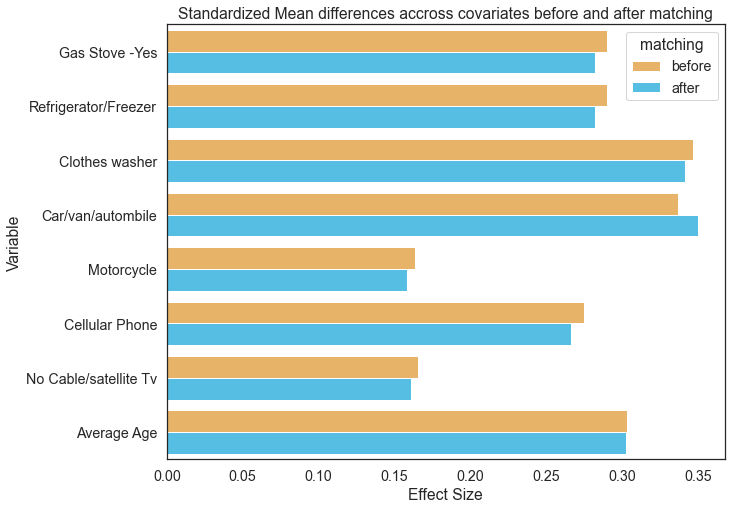

In [180]:
psm_2019.effect_size_plot(before_color='#FCB754', after_color='#3EC8FB', save=False)

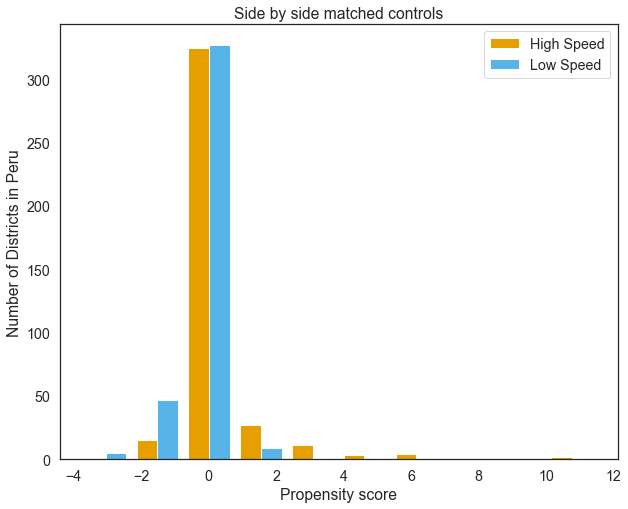

In [182]:
psm_2019.plot_match(Title='Side by side matched controls', Ylabel='Number of Districts in Peru', Xlabel= 'Propensity score', names = ['High Speed', 'Low Speed'], colors=['#E69F00', '#56B4E9'] ,save=True)


In [183]:
# rwi_cellular_census_2019.to_csv("/Users/ishaarora/Desktop/rwi_cellular_census_2019")